# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [9]:
!pip install --upgrade pip
!pip install -r ../requirements.txt


  Using cached SQLAlchemy-1.4.37-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
  Using cached pandas-1.4.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)
  Using cached psycopg2_binary-2.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached numpy-1.23.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached ipyleaflet-0.17.0-py2.py3-none-any.whl (3.3 MB)
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached greenlet-1.1.2

In [11]:
!pip install plotly
!pip install seaborn
!pip install folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 113.7 MB/s eta 0:00:0000:0100:01


In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score



In [13]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:

df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
755,1,128,88,39,110,36.5,1.057,37,1
211,0,147,85,54,0,42.8,0.375,24,0
206,8,196,76,29,280,37.5,0.605,57,1
617,2,68,62,13,15,20.1,0.257,23,0
493,4,125,70,18,122,28.9,1.144,45,1
285,7,136,74,26,135,26.0,0.647,51,0
86,13,106,72,54,0,36.6,0.178,45,0
625,4,90,88,47,54,37.7,0.362,29,0
300,0,167,0,0,0,32.3,0.839,30,1
712,10,129,62,36,0,41.2,0.441,38,1


In [16]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [24]:
df_raw['Outcome'].value_counts()

0    475
1    249
Name: Outcome, dtype: int64

In [25]:
df_raw[df_raw['Pregnancies']>11]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
215,12,151,70,40,271,41.8,0.742,38,1
254,12,92,62,7,258,27.6,0.926,44,1
274,13,106,70,0,0,34.2,0.251,52,0
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1


<AxesSubplot:>

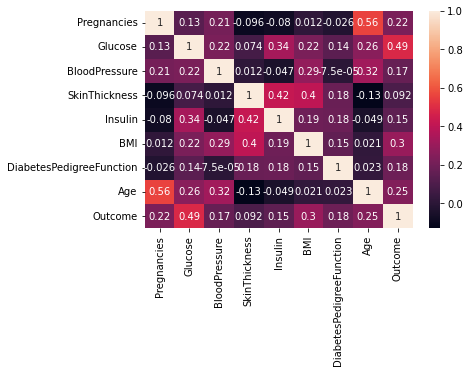

In [27]:
sns.heatmap(df_raw.corr(),annot=True)

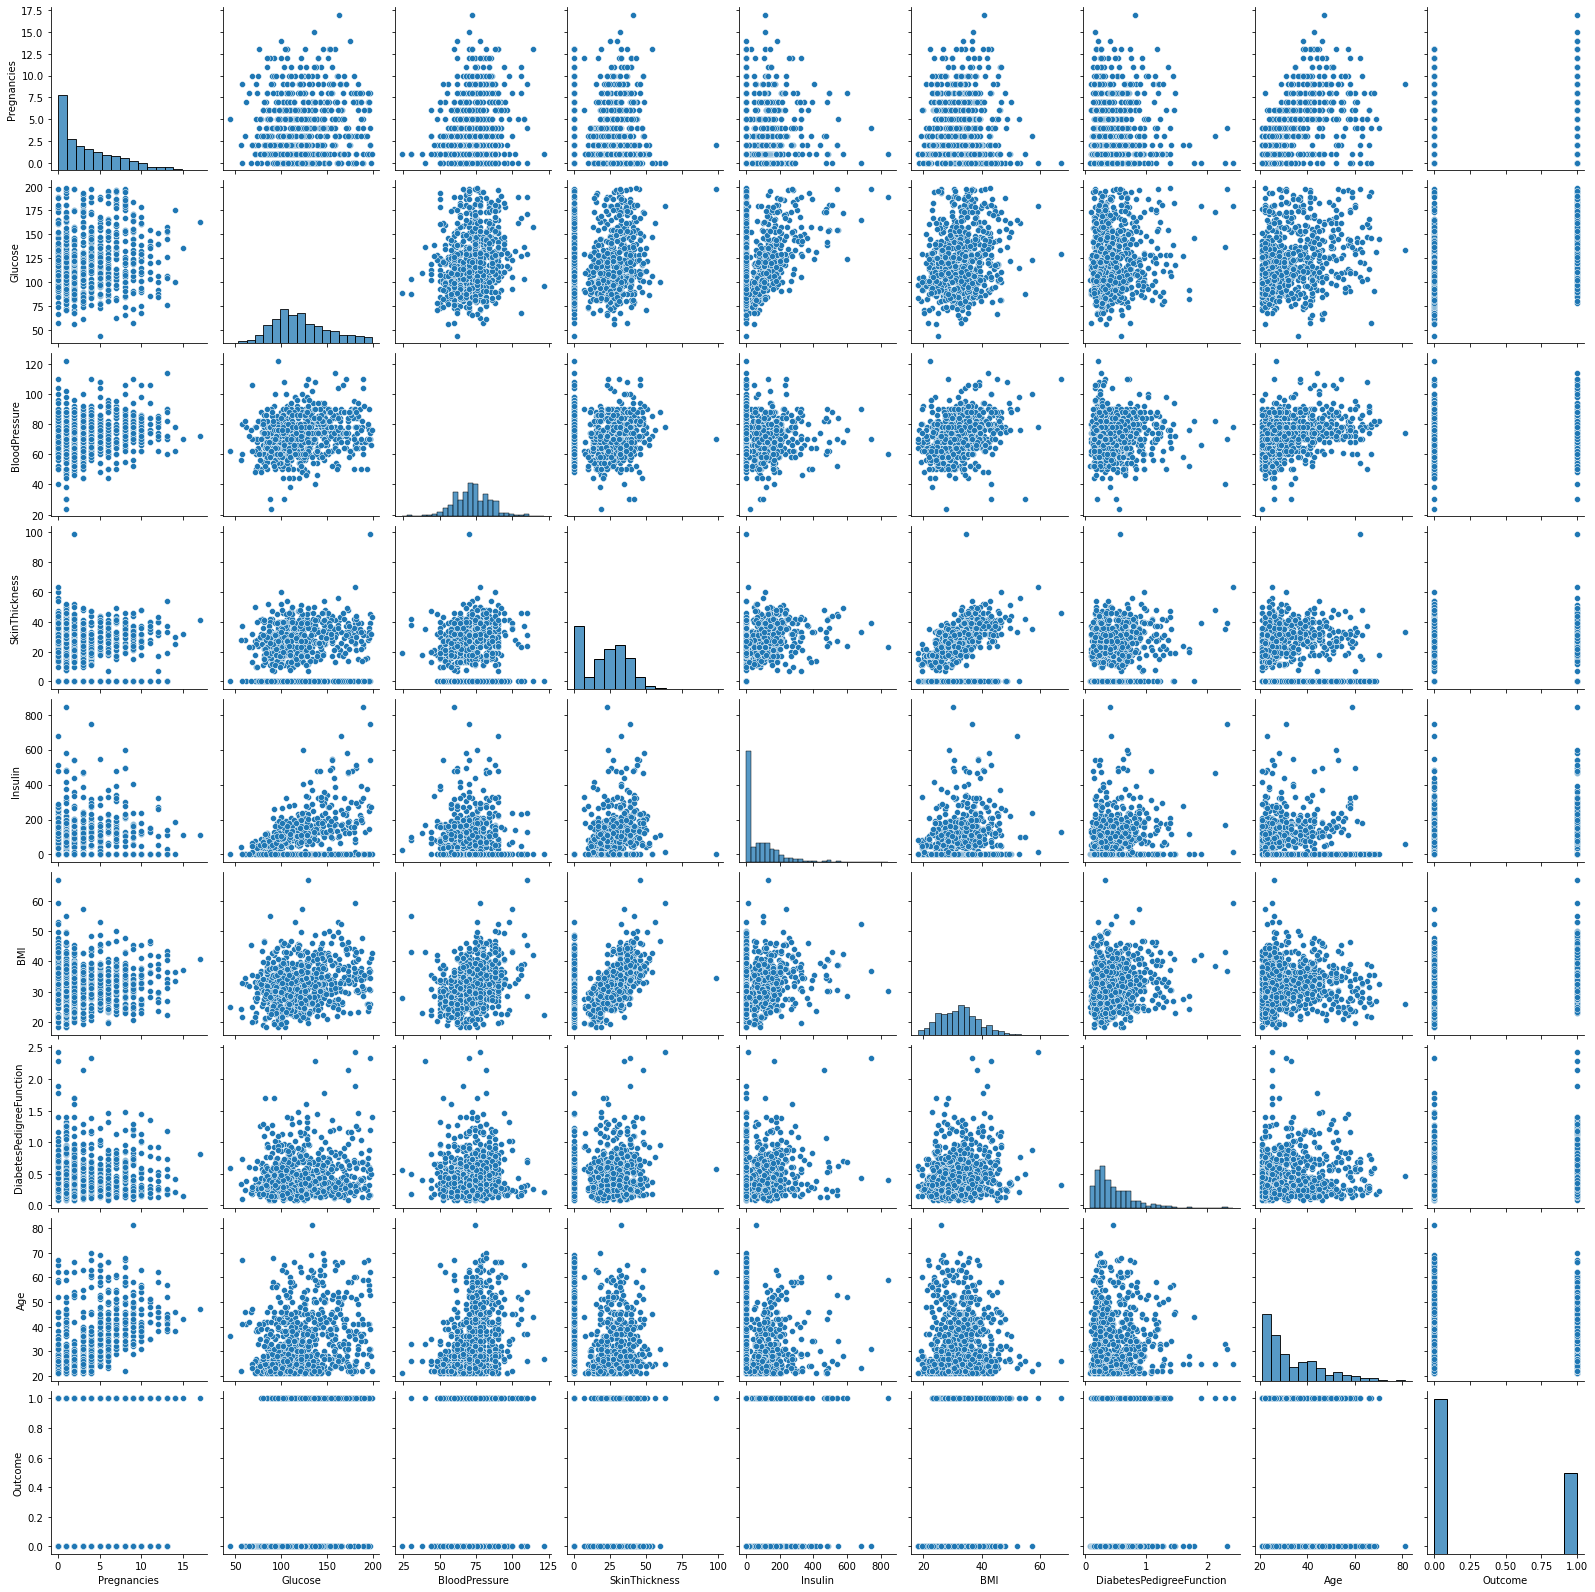

In [28]:
sns.pairplot(df_raw)

In [17]:
df_raw = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter = df_raw.copy()
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


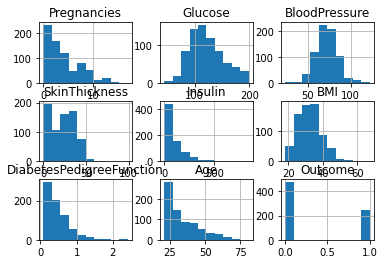

In [29]:
df_raw.hist()
plt.show()

In [39]:
X=df_raw.drop('Outcome',axis='columns')
Y=df_raw["Outcome"]


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.63502182,  0.84993279, -0.03237751, ...,  0.16456174,
         0.45842062,  1.41607523],
       [-0.85286102, -1.20026207, -0.51737031, ..., -0.85226209,
        -0.37269083, -0.19994691],
       [ 1.23017496,  1.98892994, -0.67903458, ..., -1.33162189,
         0.59392792, -0.11489311],
       ...,
       [ 0.33744525, -0.02872215, -0.03237751, ..., -0.9103663 ,
        -0.69188581, -0.28500071],
       [-0.85286102,  0.13399173, -1.00236311, ..., -0.34385017,
        -0.37871338,  1.16091384],
       [-0.85286102, -0.93991986, -0.19404178, ..., -0.30027201,
        -0.48109667, -0.88037728]])

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [44]:
#Fit the data

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
model.score(X_train,Y_train)

1.0

In [34]:
clf_pred=clf.predict(X_test)

In [46]:
#Get the score of your predictions

model.score(X_test,Y_test)

0.7155963302752294

[[113  35]
 [ 27  43]]


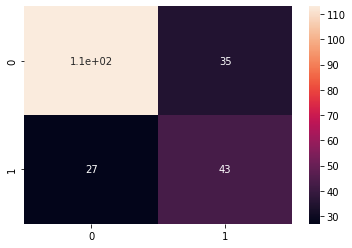

In [47]:
print(confusion_matrix(Y_test,model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,model.predict(X_test)), annot=True)
plt.show()

In [48]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       148
           1       0.55      0.61      0.58        70

    accuracy                           0.72       218
   macro avg       0.68      0.69      0.68       218
weighted avg       0.72      0.72      0.72       218



In [49]:
print(model.feature_importances_)

[0.06616332 0.31049312 0.0904057  0.07313814 0.10015451 0.16221569
 0.13328382 0.06414571]


In [50]:
print(model.get_n_leaves())

95


In [52]:
dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
dt_model.score(X_train,Y_train)

1.0

In [55]:
print(confusion_matrix(Y_test,dt_model.predict(X_test)))

[[119  29]
 [ 24  46]]


In [56]:
print(classification_report(Y_test, dt_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       148
           1       0.61      0.66      0.63        70

    accuracy                           0.76       218
   macro avg       0.72      0.73      0.73       218
weighted avg       0.76      0.76      0.76       218



In [57]:
print(accuracy_score(Y_test,dt_model.predict(X_test)))

0.7568807339449541


In [58]:
print(dt_model.feature_importances_)

[0.10701014 0.23738536 0.11708241 0.04311956 0.07107933 0.15066982
 0.1920332  0.08162018]


In [59]:
print(dt_model.get_n_leaves())

88


In [60]:
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [61]:
print(dt_model.get_depth())

14


In [62]:
#Using Grid Search to get best hyperparameters

from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train,Y_train)
print(clf.best_params_)
print(clf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 3}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)


In [63]:
#uso los parametros
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)

In [64]:
model2.score(X_test,Y_test)

0.7614678899082569

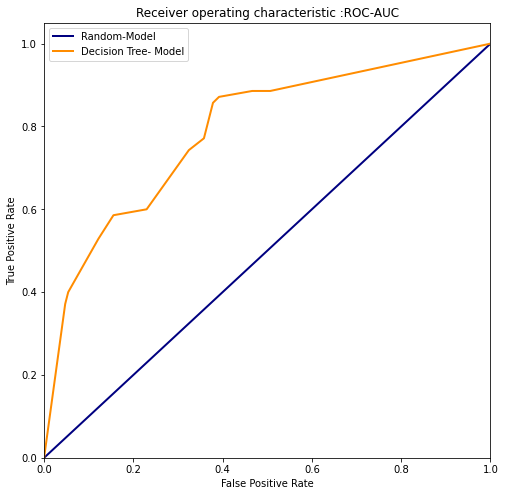

Computed Area Under the Curve (AUC) 0.7891891891891891


In [65]:
from sklearn.metrics import roc_curve,auc
fpr,tpr, thresholds = roc_curve(Y_test,model2.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision Tree- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))